**The goal of the Decision Tree model** in this case is to classify patients into two groups: "Alive" and "Dead," based on features such as age, tumor size, lymph node status, etc. The steps include:

* **Data Preprocessing:** Reading the data and splitting it into input features and target labels.
* **Model Training:** Using the Decision Tree algorithm to learn from the training data.
* **Model Evaluation:** Assessing the model using metrics such as accuracy, confusion matrix, and classification report.
* **Visualization:** Drawing the decision tree and confusion matrix to better understand the model's behavior.

This model can help predict patients' survival status based on clinical factors and support decision-making in medical applications.

**Impact of Data Preprocessing:**
* **Handling Missing Values**: While Decision Trees can relatively handle missing values, removing or imputing missing data improves the model's quality.
* **Feature Preprocessing**: Removing irrelevant or low-discriminative features simplifies the model and helps prevent overfitting.

**Limitations of the Study:**

* Overfitting: Decision Trees are prone to overfitting if the tree is too deep.When the tree learns too much detail from the training data, the model may fail to generalize well to test data.
* Sensitivity to Noisy Data: If the dataset contains significant noise (outliers), the Decision Tree may fit patterns that do not represent the overall data, reducing accuracy.

**Scalability and Improvements:**

* Pruning: To prevent overfitting, pruning methods can be applied to reduce the tree's depth and eliminate unnecessary branches, improving the model's generalization ability.
* Feature Engineering: By creating new features with high discriminative power, the Decision Tree model can capture more complex patterns and improve predictive performance.

**Comparison with Other Studies:**
In breast cancer studies, Decision Trees are often used due to their simplicity and clear interpretability. However, recent research increasingly adopts more robust models like Random Forest or XGBoost, as they can handle more complex relationships and mitigate overfitting.

Add required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


Read data

In [2]:
df=pd.DataFrame(pd.read_csv('/content/Breast_Cancer.csv'))

Check the data

In [3]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [4]:

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [5]:
check(df)

,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


Convert values ​​in DataFrame to numbers

In [6]:
df1=df.copy()
le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


Summary of data statistics

In [7]:
temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,23.972167,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,2.131710,0.977137,29.226392,0.933151,0.826541,13.349155,3.154573,70.297962,0.153082
std,8.963134,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.642398,0.149485,20.207811,0.249791,0.378691,8.060677,5.084615,22.921430,0.360111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,15.000000,1.000000,1.000000,8.000000,0.000000,55.000000,0.000000
50%,24.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,24.000000,1.000000,1.000000,13.000000,1.000000,72.000000,0.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,37.000000,1.000000,1.000000,18.000000,4.000000,89.000000,0.000000
max,39.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,109.000000,1.000000,1.000000,53.000000,37.000000,106.000000,1.000000


Calculate correlation matrix and draw heatmap

<Axes: >

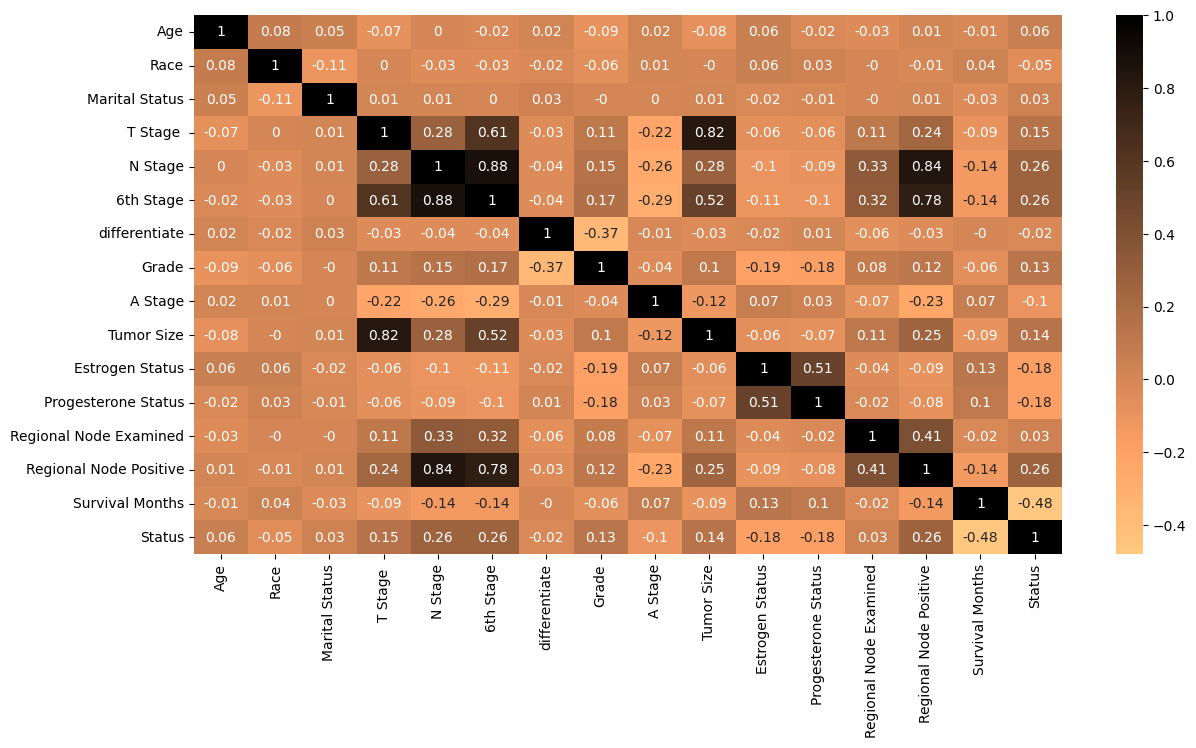

In [8]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'copper_r')

**Data Splitting**

* X are the input features, created by removing the Status_Dead column from the dataframe df.
* y are the output labels, here the Status_Dead column, with values ​​0 (Alive) or 1 (Dead).

In [10]:
df2=df1.copy()
X = df2.drop('Status', axis=1)
y = df2['Status']

The data is split into two parts: 80% for training (X_train, y_train) and 20% for testing the model (X_test, y_test). random_state=42 ensures randomness of the data split but can reproduce the results if needed.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Decision Tree model

* Create a DecisionTreeClassifier model from the sklearn library and train the model with the training data (X_train, y_train).
* The max_depth=5 parameter limits the depth of the decision tree to avoid the model being too complex and prone to overfitting (overfitting the training data).

In [24]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Model prediction and evaluation

In [20]:
y_pred = model.predict(X_test)

Calculate and print out the model evaluation metrics:

* Accuracy: The ratio of correctness between prediction and actual value.
* Classification report: Provides metrics such as Precision, Recall, F1-Score for each class (Alive, Dead).

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9043478260869565

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.79      0.48      0.60       120

    accuracy                           0.90       805
   macro avg       0.85      0.73      0.77       805
weighted avg       0.90      0.90      0.89       805



Decision Tree Visualization

The diagram will show the decisions the model makes at each node in the tree, along with information such as which features are selected for segmentation and the proportion of samples that fall into the "Alive" and "Dead" classes.

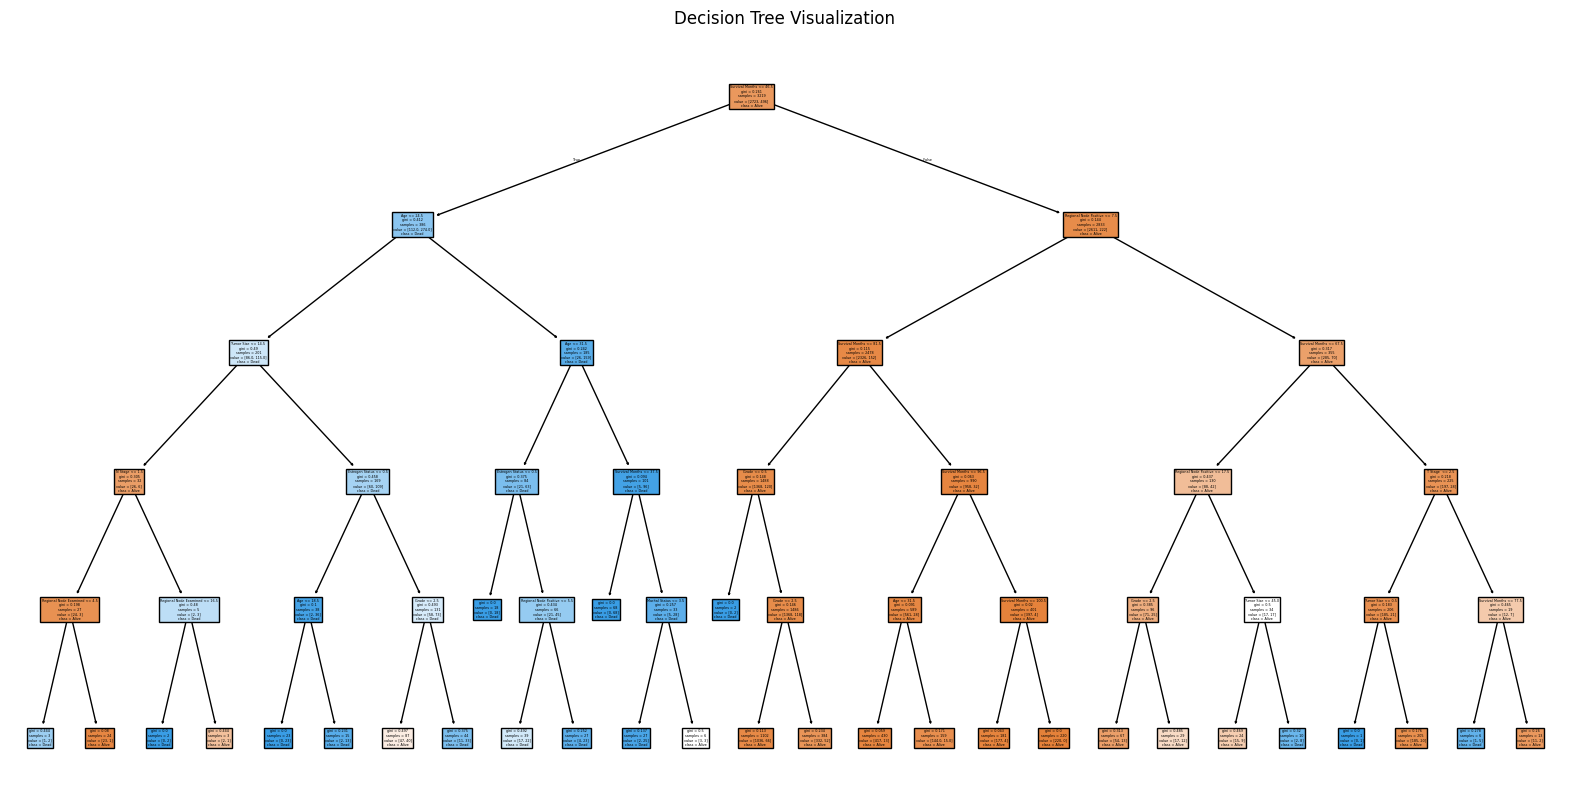

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Alive', 'Dead'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

Confusion Matrix

* Confusion matrix is ​​a tool to evaluate the quality of a classification model.

* The x-axis is the predicted label of the model (Alive, Dead).

* The y-axis is the actual label.

* This matrix helps you see the number of correct and incorrect predictions of the model.

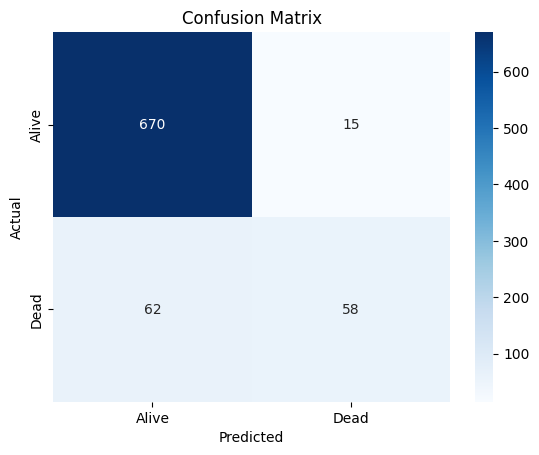

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()